### Hierarchical Clustering

This method comes into practice mainly because of the fact that in case of K Means clustering we need to pre-decide the number of clusters (K centroids) which we need for the data & even to calculate WCSS, we need to iterate which is not compute friendly. 

Here, we are going to look into implementation of the bottom-up (or Agglomerative) approach of cluster building. We start by defining any sort of similarity between the datapoints. Generally, we consider the Euclidean distance. The points which are closer to each are more similar than the points which re farther away. The Algorithms starts with considering all points as separate clusters and then grouping pints together to form clusters.

Mainly, hierarchical clustering makes use of Agglomerative method of clustering using a concept of Linkage, which is the method which we use to link the sub-clusters into single clusters. There are 5 commonly used methods for linkage, while there are many others in place: 

- Single = cluster distance -> smallest pairwise distance 
- Complete = cluster distance -> largest pairwise distance 
- Average = cluster distance -> average pairwise distance 
- Centroid = cluster distance -> distance between the centroids of the clusters
- Ward = cluster distance/criteria -> minimize the variance in the cluster(s) 

**Single Linkage:** Minimal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the smallest of these dissimilarities. Single linkage can result in extended, trailing clusters in which single observations are fused one-at-a-time.

- cluster distance is the smallest distance between any point in cluster 1 and any point in cluster 2
- highly sensitive to outliers when forming flat clusters
- works well for low-noise data with an unusual structure

**Complete Linkage:** Maximal intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the largest of these dissimilarities.

- cluster distance is the largest distance between any point in cluster 1 and any point in cluster 2
- less sensitive to outliers than single linkage

**Average Linkage:** Mean intercluster dissimilarity. Compute all pairwise dissimilarities between the observations in cluster A and the observations in cluster B, and record the average of these dissimilarities.

- cluster distance is the average distance of all pairs of points in clusters 1 and 2

**Centroid Linkage:** The dissimilarity between the centroid for cluster A (a mean vector of length p) and the centroid for cluster B. Centroid linkage can result in undesirable inversions.

- cluster distance is the distance of the centroids of both clusters

**Ward linkage:** Wikipidea says _Ward's minimum variance criterion minimizes the total within-cluster variance. To implement this method, at each step find the pair of clusters that leads to minimum increase in total within-cluster variance after merging._

- based on minimizing a variance criterion before and after merging


#**Demo: Hierarchial Clustering on Wholesale Distributor Data**



###**Problem Definition**

A wholesale distributor based out of Melbourne is using data analysis to understand how much people spend on different products. He is a novice data enthusiast who doesn't understand much about clustering. You as a data scientist is required to perform Hierarchial Clustering on the dataset to help him understand how much people spend on milk region-wise.  


###**Dataset Description**

The dataset refers to clients of a wholesale distributor. It includes the annual spending in monetary units (m.u.) on diverse product categories. It contains 8 columns with 400 instances.

Attribute Information:

>* **FRESH**: annual spending (m.u.) on fresh products (Continuous)
>* **MILK**: annual spending (m.u.) on milk products (Continuous)
>* **GROCERY**: annual spending (m.u.)on grocery products (Continuous)
>* **FROZEN**: annual spending (m.u.)on frozen products (Continuous)
>* **DETERGENTS_PAPER**: annual spending (m.u.) on detergents and paper products (Continuous)
>* **DELICATESSEN**: annual spending (m.u.)on and delicatessen products (Continuous)
>* **CHANNEL**: customers Channel - Horeca (Hotel/Restaurant/Cafe) or Retail channel (Nominal)
>* **REGION**: customers Region Lisnon, Oporto or Other (Nominal)



###**Tasks to be performed**

>* Importing Required Libraries
>* Loading the dataset
>* Analyzing and preparing the dataset
>* Understanding Hierarchical Clustering
>* Getting the Dendrograms
>* Applying Agglomerative Clustering
>* Visualizing the Clusters
>* Inference

####**Importing Required Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
import warnings
warnings.filterwarnings("ignore")

####**Loading the Dataset**

In [3]:
df = pd.read_csv('./Wholesale customers data.csv')
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


####**Analyzing and preparing the Dataset**

In [0]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [0]:
df.dtypes

Channel             int64
Region              int64
Fresh               int64
Milk                int64
Grocery             int64
Frozen              int64
Detergents_Paper    int64
Delicassen          int64
dtype: object

In [0]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [5]:
#Standardizing or Normalizing our dataset to bring all the features in the same scale
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1.448652,0.590668,0.052933,0.523568,-0.041115,-0.589367,-0.043569,-0.066339
1,1.448652,0.590668,-0.391302,0.544458,0.170318,-0.270136,0.086407,0.089151
2,1.448652,0.590668,-0.447029,0.408538,-0.028157,-0.137536,0.133232,2.243293
3,-0.690297,0.590668,0.100111,-0.624020,-0.392977,0.687144,-0.498588,0.093411
4,1.448652,0.590668,0.840239,-0.052396,-0.079356,0.173859,-0.231918,1.299347


####**Getting the Dendrogram**

The Hierarchial Clustering technique can be visualized with a **Dendrogram**.

A dendrogram is a tree-like diagram showing hierarchical clustering. It shows the relationships between similar sets of data-points. We can also use the concept of Dendrogram to decide the number of clusters in Hieararchial Clustering.

Text(0, 0.5, 'Distance between Samples')

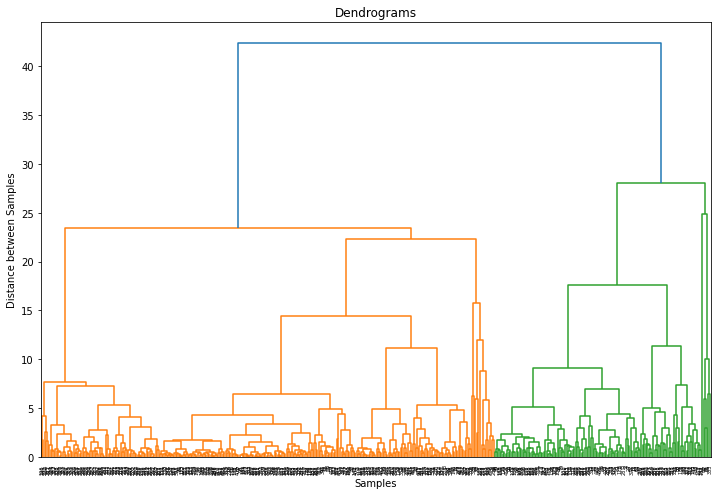

In [6]:
plt.figure(figsize=(12, 8))
plt.title("Dendrograms")  
dendrogram = shc.dendrogram(shc.linkage(scaled_df, method='ward'))#ward is one of the methods that is used to calculate distance between newly formed clusters
plt.xlabel('Samples')
plt.ylabel('Distance between Samples')

#####**How to decide the Number of Clusters?**



From above, you can see that blue line has the maximum distance. We can select a threshold of 30 and the cut the dendrogram.

In [ ]:
plt.figure(figsize=(12, 8))
plt.title("Dendrograms")  
dendrogram = shc.dendrogram(shc.linkage(scaled_df, method='ward'))#ward is used to calculate distance between newly formed clusters and can only be used with Euclidean Distance 
plt.axhline(y=30, color='k', linestyle='--')
plt.xlabel('Samples')
plt.ylabel('Distance between Samples')
plt.show()

**From above, you can see that the line cuts the dendrogram at two points. That means we are going to apply hierarchial clustering for two clusters**

###**Applying Hierarchial Clustering**

In [ ]:
#Agglomerative Hierarchial Clustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')#ward is one of the methods that is used to calculate distance between newly formed clusters
cluster.fit_predict(scaled_df)#Fit the hierarchical clustering from features or distance matrix, and return cluster labels.

**From above, you can see two distinct values 0's and 1's beacuse we defined two clusters. 0 represents the points that belongs to the first cluster and 1 represents the points that belongs to the second cluster. These values represents the cluster labels**

###**Visualizing the Two Clusters**

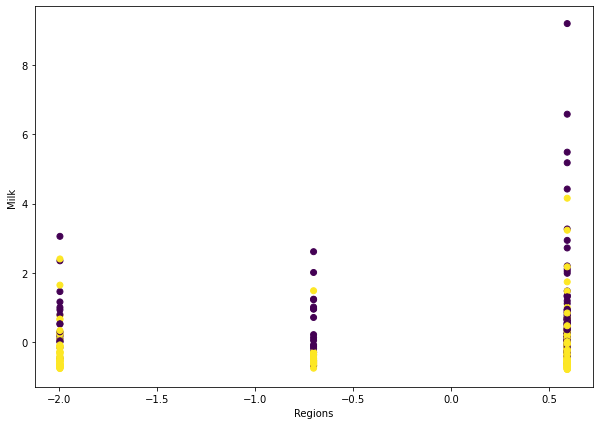

In [10]:
#plot the clusters to see how actually our data has been clustered
plt.figure(figsize=(10, 7))
plt.scatter(scaled_df.iloc[:,1],scaled_df.iloc[:,3], c=cluster.labels_) 
plt.xlabel('Regions')
plt.ylabel('Milk')
plt.show()


**From above, you can see the data-points in the form of two clusters**